# Find best model precision threshold

In [18]:
import json
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import shutil
import math
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
import subprocess
import csv
import seaborn as sns

In [6]:
model = 'yolov5s_data_augmentation'
DATA_SET_PATH = '/media/rodri/Files/Datasets/Roboflow_v11/Dataset'

DATA_PATH = os.path.join(DATA_SET_PATH, 'reports', model, 'metrics')

In [7]:
df = pd.read_csv(os.path.join(DATA_PATH, 'merged.csv'))
df.head()

,path,true_class,predicted_class,xmin_true,ymin_true,xmax_true,ymax_true,xmin_predicted,ymin_predicted,xmax_predicted,ymax_predicted,iou,confidence
0,/media/rodri/Files/Datasets/Roboflow_v11/Datas...,1,0,170,1,640,459,0,0,0,0,0.000000,0.000
1,/media/rodri/Files/Datasets/Roboflow_v11/Datas...,1,1,60,149,345,478,72,172,286,372,0.456460,0.463
2,/media/rodri/Files/Datasets/Roboflow_v11/Datas...,1,0,46,66,583,603,0,0,0,0,0.000000,0.000
3,/media/rodri/Files/Datasets/Roboflow_v11/Datas...,1,1,1,6,625,608,25,-11,641,622,0.893228,0.881
4,/media/rodri/Files/Datasets/Roboflow_v11/Datas...,1,1,3,90,535,558,16,88,553,587,0.886315,0.548


## Getting best precision for guns by confidence threshold

In [27]:
new_trues = [x for x in df['true_class'] if x != 2]
new_preds = [x for x,y in zip(df['predicted_class'], df['true_class']) if y != 2]
confidences = [x for x,y in zip(df['confidence'], df['true_class']) if y != 2]
print(len(new_trues), len(new_preds), len(confidences))
accuracies = []
last_new_preds = []

for i in tqdm(range(0,101)):
    sub_new_preds = [x if y >= i/100 else 0 for x,y in zip(new_preds, confidences)]
    
    last_new_preds = sub_new_preds
    accuracies.append(accuracy_score(new_trues, sub_new_preds))

914 914 914


100%|██████████| 101/101 [00:00<00:00, 512.24it/s]


Best confidence:  40
Accuracy:  0.8676148796498906


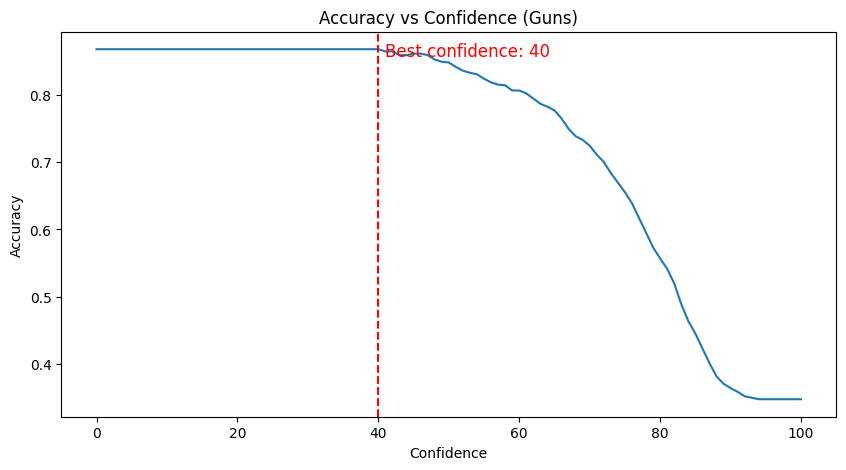

In [28]:
# Plot accuracies

plt.figure(figsize=(10,5))
plt.plot(accuracies)
plt.title('Accuracy vs Confidence (Guns)')
plt.xlabel('Confidence')
plt.ylabel('Accuracy')

# Draw best confidence
max_acc = max(accuracies)
max_acc_index = max(index for index, item in enumerate(accuracies) if item == max_acc)
print('Best confidence: ', max_acc_index)
print('Accuracy: ', max_acc)
plt.axvline(x=max_acc_index, color='r', linestyle='--')
# Adding text
plt.text(max_acc_index+1, max_acc-0.01, 'Best confidence: '+str(max_acc_index), fontsize=12, color='r')
plt.show()

## Getting best precision for knives by confidence threshold

In [24]:
new_trues = [x for x in df['true_class'] if x != 1]
new_preds = [x for x,y in zip(df['predicted_class'], df['true_class']) if y != 1]
confidences = [x for x,y in zip(df['confidence'], df['true_class']) if y != 1]

accuracies = []
last_new_preds = []

for i in tqdm(range(0,101)):
    sub_new_preds = [x if y >= i/100 else 0 for x,y in zip(new_preds, confidences)]
    
    last_new_preds = sub_new_preds
    accuracies.append(accuracy_score(new_trues, sub_new_preds))

100%|██████████| 101/101 [00:00<00:00, 492.83it/s]


Best confidence:  40
Accuracy:  0.8907563025210085


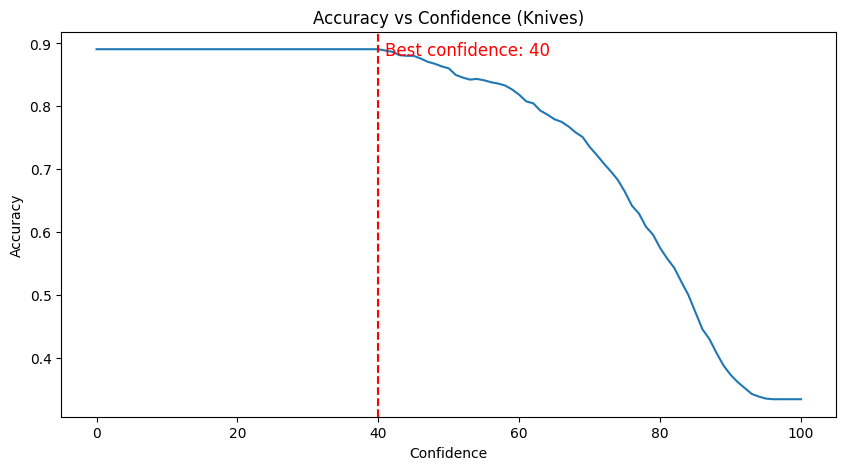

In [25]:
# Plot accuracies

plt.figure(figsize=(10,5))
plt.plot(accuracies)
plt.title('Accuracy vs Confidence (Knives)')
plt.xlabel('Confidence')
plt.ylabel('Accuracy')

# Draw best confidence
max_acc = max(accuracies)
max_acc_index = max(index for index, item in enumerate(accuracies) if item == max_acc)
print('Best confidence: ', max_acc_index)
print('Accuracy: ', max_acc)
plt.axvline(x=max_acc_index, color='r', linestyle='--')
# Adding text
plt.text(max_acc_index+1, max_acc-0.01, 'Best confidence: '+str(max_acc_index), fontsize=12, color='r')
plt.show()